<a href="https://colab.research.google.com/github/astitwa-agarwal12/Facial-Recognition/blob/main/FacialRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! unzip '/content/drive/MyDrive/archive (6).zip'

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Model, Sequential
#from tensorflow.python.keras.optimizer_v2.adam import Adam
#from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import RMSprop
#from keras.optimizers import rmsprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [33]:
picture_size = 48
folder_path = "/content/images/images/"

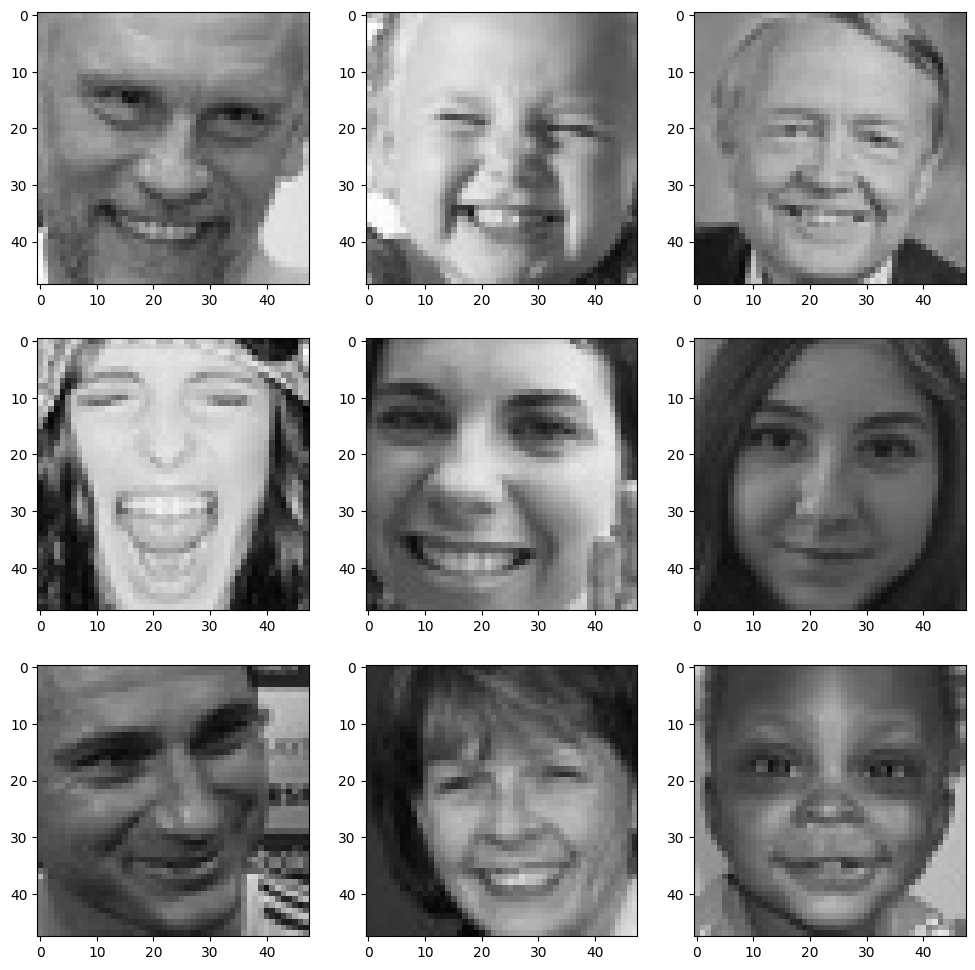

In [34]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [35]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [43]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



In [44]:
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [46]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-46-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - ETA: 0s - loss: 1.7983 - accuracy: 0.3086

225/225 [==============================] - 23s 77ms/step - loss: 1.7983 - accuracy: 0.3086 - val_loss: 2.0817 - val_accuracy: 0.2990 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4431 - accuracy: 0.4473

225/225 [==============================] - 17s 77ms/step - loss: 1.4431 - accuracy: 0.4473 - val_loss: 1.3475 - val_accuracy: 0.4825 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2721 - accuracy: 0.5120

225/225 [==============================] - 18s 80ms/step - loss: 1.2721 - accuracy: 0.5120 - val_loss: 1.2558 - val_accuracy: 0.5205 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1833 - accuracy: 0.5488

225/225 [==============================] - 17s 77ms/step - loss: 1.1833 - accuracy: 0.5488 - val_loss: 1.3093 - val_accuracy: 0.5053 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1283 - accuracy: 0.5666

225/225 [==============================] - 17s 77ms/step - loss: 1.1283 - accuracy: 0.5666 - val_loss: 1.2377 - val_accuracy: 0.5229 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0778 - accuracy: 0.5891

225/225 [==============================] - 18s 79ms/step - loss: 1.0778 - accuracy: 0.5891 - val_loss: 1.1048 - val_accuracy: 0.5862 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.0253 - accuracy: 0.6113

225/225 [==============================] - 18s 79ms/step - loss: 1.0253 - accuracy: 0.6113 - val_loss: 1.1150 - val_accuracy: 0.5794 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9804 - accuracy: 0.6290

225/225 [==============================] - 17s 77ms/step - loss: 0.9804 - accuracy: 0.6290 - val_loss: 1.1298 - val_accuracy: 0.5710 - lr: 0.0010
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 0.9449 - accuracy: 0.6419

225/225 [==============================] - 18s 79ms/step - loss: 0.9449 - accuracy: 0.6419 - val_loss: 1.0268 - val_accuracy: 0.6220 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.9029 - accuracy: 0.6620

225/225 [==============================] - 18s 79ms/step - loss: 0.9029 - accuracy: 0.6620 - val_loss: 1.1110 - val_accuracy: 0.5903 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.8632 - accuracy: 0.6751

225/225 [==============================] - 17s 76ms/step - loss: 0.8632 - accuracy: 0.6751 - val_loss: 1.0528 - val_accuracy: 0.6176 - lr: 0.0010
Epoch 12/48
225/225 [==============================] - ETA: 0s - loss: 0.8169 - accuracy: 0.6953Restoring model weights from the end of the best epoch: 9.



Epoch 12: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 17s 76ms/step - loss: 0.8169 - accuracy: 0.6953 - val_loss: 1.2281 - val_accuracy: 0.5574 - lr: 0.0010
Epoch 12: early stopping


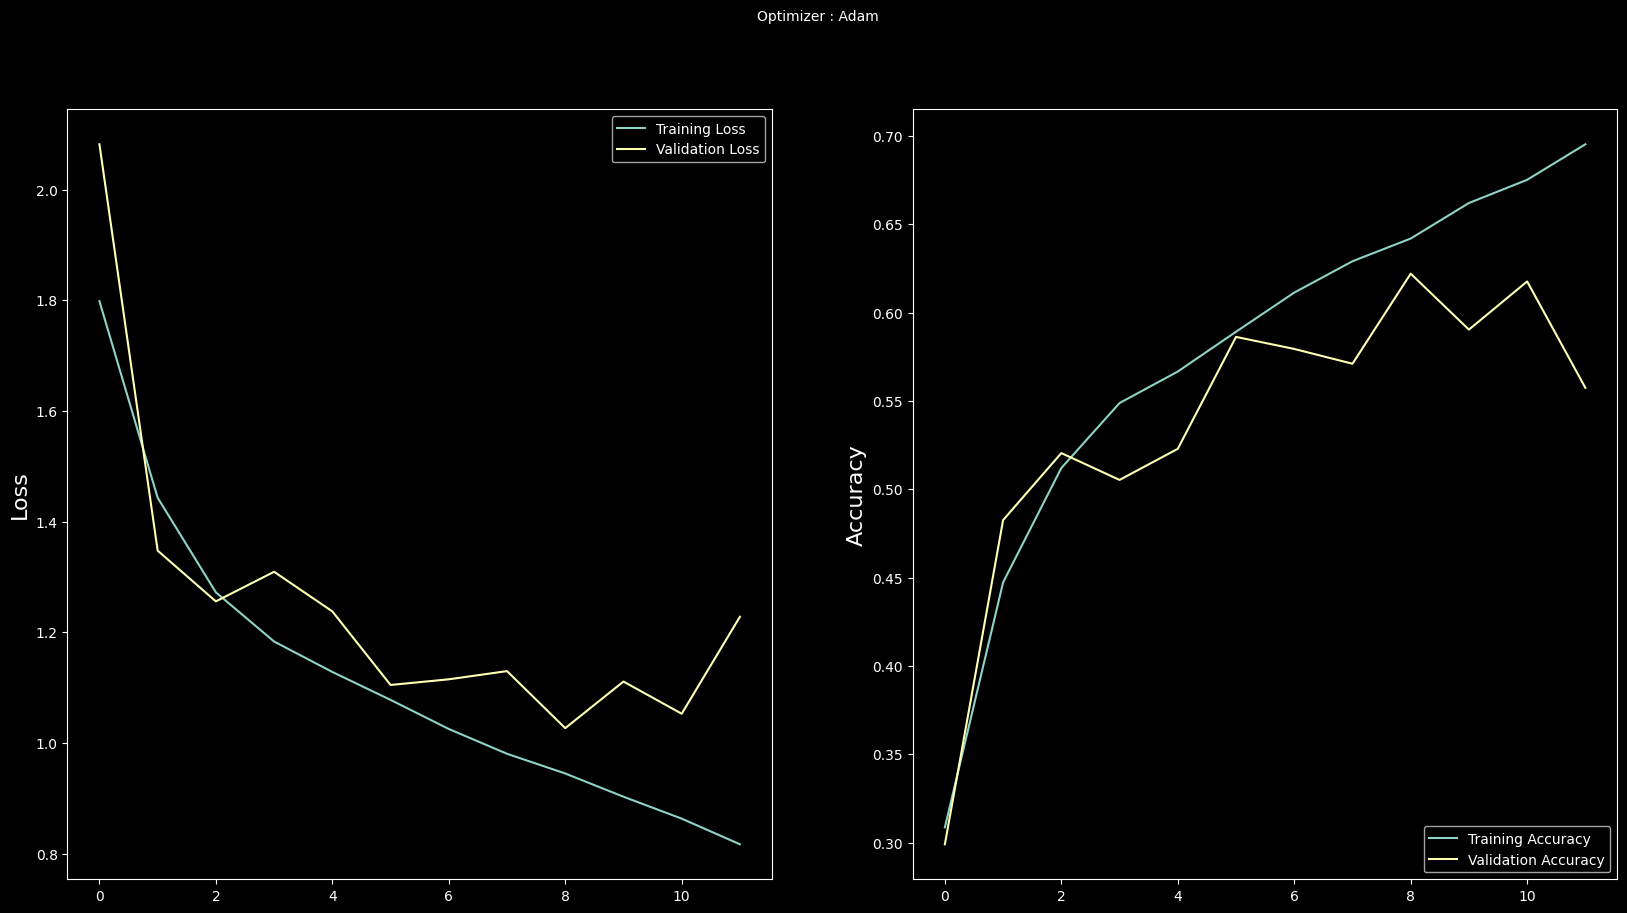

In [47]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()